In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

disableWarnings = True
if disableWarnings:
    import warnings
    warnings.filterwarnings('ignore')

## Create some noisy sample data

In [2]:
x = np.arange(0.0, 2*np.pi, 0.1)
noise = np.random.normal(0.0,0.35,x.shape)
y = np.sin(x)
y_noise = y + noise

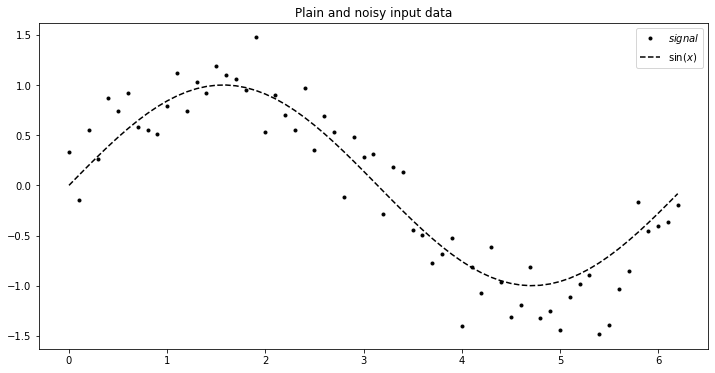

In [14]:
plt.figure(figsize=(12,6))
plt.plot(x,y_noise,'k.',label=r"$signal$")
plt.plot(x,y,'k--',label=r"$\sin(x)$")
plt.title("Plain and noisy input data")
plt.legend()

## Fit polynomials of different orders
$\hat{y}= \underbrace{\underbrace{a_0 + a_1x}_{first\:order}+a_2x²}_{second\:order} \dots$

In [15]:
orders = [1,4,20]
fits = [np.poly1d(np.polyfit(x,y_noise,o))(x) for o in orders]

### Visualize the predicted values

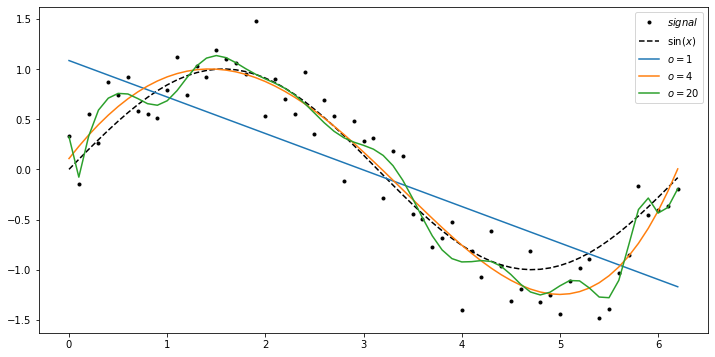

In [34]:
plt.figure(figsize=(12,6))
plt.plot(x,y_noise,'k.',label=r"$signal$")
plt.plot(x,y,'k--',label=r"$\sin(x)$")
for o,f in zip(orders,fits):
    plt.plot(x,f,label=fr"$o={o}$")
plt.legend();

## Regularization

### Create a helper function for Ridge ($L2$) and Lasso ($L1$) regularization:

In [21]:
def regulatedFit(x,y,order,alpha=1e-3,regulator = Ridge):
    _m = make_pipeline(PolynomialFeatures(order), regulator(alpha=alpha))
    _m.fit(x.reshape(-1, 1), y)
    return _m.predict(x.reshape(-1, 1))

In [38]:
alphas = [1e2,1,1e-2,1e-3]

### Ridge Regularization

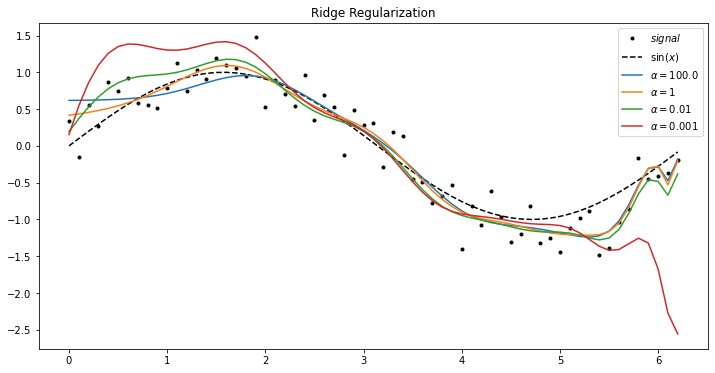

In [39]:
plt.figure(figsize=(12,6))
plt.plot(x,y_noise,'k.',label=r"$signal$")
plt.plot(x,y,'k--',label=r"$\sin(x)$")
for a in alphas:
    plt.plot(x,regulatedFit(x,y_noise,20,alpha=a,regulator=Ridge),label=rf"$\alpha = {a}$")

plt.legend()
plt.title('Ridge Regularization');

### Lasso Regularization

Text(0.5, 1.0, 'Lasso Regularization')

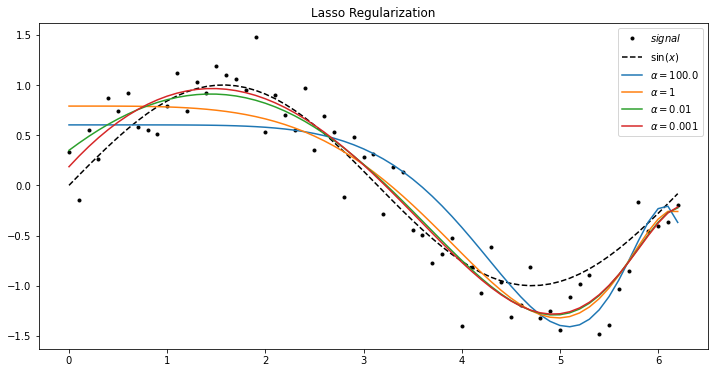

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(x, y_noise, "k.", label=r"$signal$")
plt.plot(x, y, "k--", label=r"$\sin(x)$")
for a in alphas:
    plt.plot(
        x,
        regulatedFit(x, y_noise, 20, alpha=a, regulator=Lasso),
        label=rf"$\alpha = {a}$",
    )

plt.legend()
plt.title("Lasso Regularization")



In [41]:
def calculateBiasVariance(y_predicted,y_true):
    _variance = np.var(y_predicted)
    _sse = np.mean((np.mean(y_predicted)-y_true)**2)
    _bias = _sse - _variance
    return _bias, _variance

In [86]:
bs = []
vs = []
orders = np.arange(1,21,1)
for o in orders:
    bv = calculateBiasVariance(np.poly1d(np.polyfit(x,y,o))(x),y)
    bs.append(bv[0])
    vs.append(bv[1])

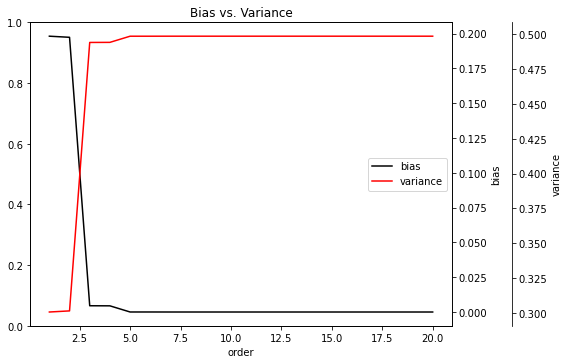

In [116]:
fig, axes = plt.subplots(figsize=(8,5))
a1 = axes.twinx()
a2 = axes.twinx()
p1, = a1.plot(orders,bs,'k',label="bias")
p2, = a2.plot(orders,vs,'r',label="variance")

lns = [p1, p2]
axes.legend(handles=lns,loc="center right")
a2.spines['right'].set_position(('outward', 60))

axes.set_xlabel("order")
a1.set_ylabel("bias")
a2.set_ylabel("variance")
fig.tight_layout()
axes.set_title('Bias vs. Variance');